In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

In [3]:
data = pd.read_csv('plants data - datura.csv')

In [4]:
data

,plant_name,temp,EC ds/m,light_time_day,red_light,blue_light,far_red,humidity,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,life cycle (m)
0,Datura,22,2.0,14,60,30,10,75,6.3,6,Medium,2.40,2.20,12,86,NaN
1,Datura,24,2.5,16,65,30,5,70,6.4,5,Medium,2.80,2.60,11,85,NaN
2,Datura,23,1.8,18,70,25,5,80,6.2,7,Medium,2.10,1.90,14,88,NaN
3,Datura,25,2.5,14,60,35,5,65,6.5,6,High,2.70,2.40,12,84,NaN
4,Datura,21,2.2,16,70,25,5,78,6.3,8,Medium,2.00,1.80,15,89,NaN
5,Datura,27,3.0,12,55,40,5,60,6.8,4,High,3.10,3.30,10,80,NaN
6,Datura,22,1.5,16,65,30,10,75,6.4,6,Medium,2.20,2.00,14,87,NaN
7,Datura,23,2.0,16,65,30,5,75,6.5,6,Medium,2.30,2.10,13,86,NaN
8,Datura,26,2.8,12,50,40,10,62,6.7,5,High,2.60,2.80,11,82,NaN
9,Datura,25,3.0,14,60,30,10,70,6.5,6,High,2.90,3.00,12,83,NaN


In [5]:
data = data.drop('life cycle (m)', axis=1)

In [6]:
data.columns

Index(['plant_name', 'temp', 'EC ds/m', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity ', 'ph', 'water_times (times/day)',
       'air flow ', 'growth_yield/m^2 (kg)', 'Active Agents (%)',
       'Growth Time (weeks)', 'accuracy'],
      dtype='object')

# poly_regression

In [34]:
data_p=data.copy()

In [35]:
# Extract features and target variable
temp = data_p['temp']            # Temperature (°C)
EC = data_p['EC ds/m']                # Electrical Conductivity (dS/m)
light_time = data_p['light_time_day'] # Light Time (hrs)
red_light = data_p['red_light']   # Red Light (%)
blue_light = data_p['blue_light'] # Blue Light (%)
far_red = data_p['far_red']       # Far Red (%)
humidity = data_p['humidity ']    # Humidity (%)
pH = data_p['ph']                # pH
watering = data_p['water_times (times/day)']    # Watering (times/day)
yield_values = data_p['growth_yield/m^2 (kg)']   # Yield (kg/m²)
air_flow = data_p['air flow ']

# Define the polynomial degree
poly_degree = 2

# Features and labels
features = {
    'Temp': temp,
    'EC': EC,
    'LightTime': light_time,
    'RedLight': red_light,
    'BlueLight': blue_light,
    'FarRed': far_red,
    'Humidity': humidity,
    'pH': pH,
    'Watering': watering,
    'AirFlow' : air_flow
}





In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler # or MinMaxScaler for normalization



discrete_features = ['air flow ','light_time_day', 'water_times (times/day)']  # Add other discrete feature names if any
numerical_features = ['temp', 'EC ds/m', 'red_light', 'blue_light', 'far_red', 'humidity ', 'ph']


actual_discrete_features = [col.strip() for col in data_p.columns if col.strip() in discrete_features]

# One-hot encoding for discrete features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data_p = encoder.fit_transform(data_p[actual_discrete_features])
encoded_df = pd.DataFrame(encoded_data_p, columns=encoder.get_feature_names_out(actual_discrete_features))
data_p = data_p.drop(columns=actual_discrete_features)
data_p = pd.concat([data_p, encoded_df], axis=1)

scaler = StandardScaler()  # or MinMaxScaler()
scaled_numerical_features = scaler.fit_transform(data_p[numerical_features])


# Features and labels
features = {}
for i, feature in enumerate(numerical_features):
    features[feature] = scaled_numerical_features[:, i]
for feature in encoded_df.columns:
    features[feature] = encoded_df[feature]

# Store coefficients
coefficients = {}

R-squared for temp: -0.2746447374615071


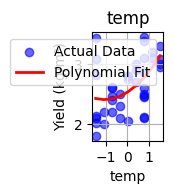

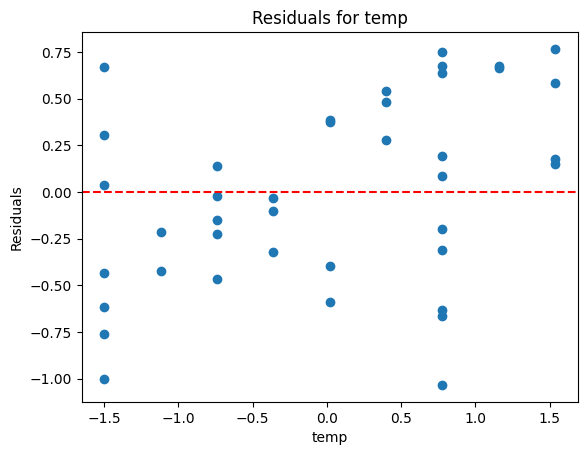

R-squared for EC ds/m: -0.044239626548151056


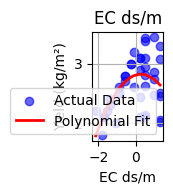

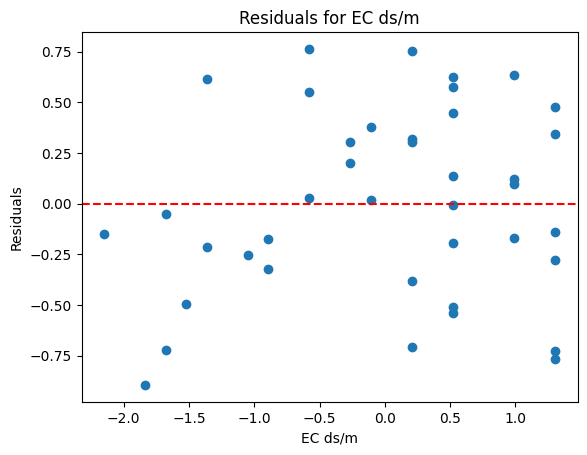

R-squared for red_light: -0.006805397083128106


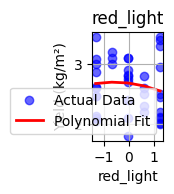

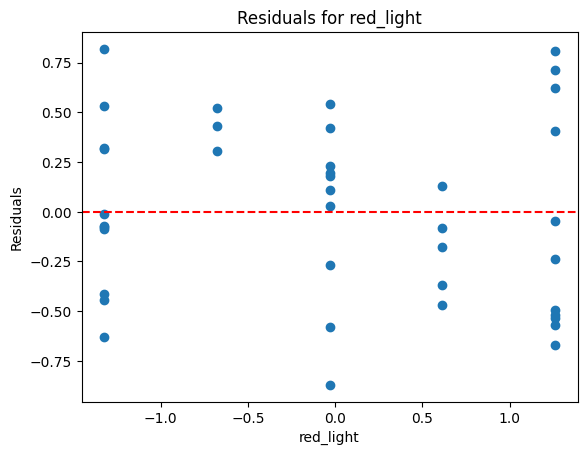

R-squared for blue_light: -0.08153997649845213


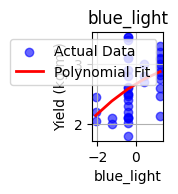

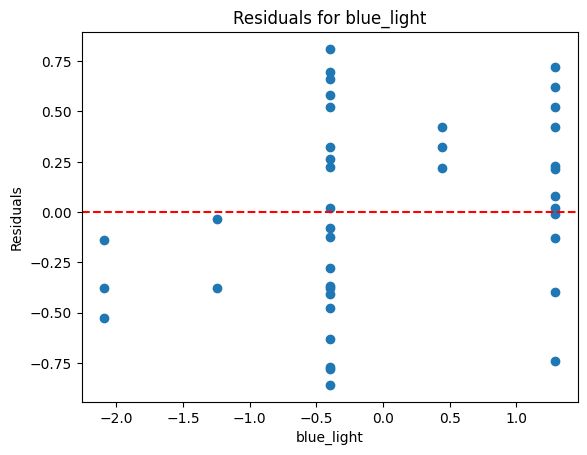

R-squared for far_red: -0.10384351361130273


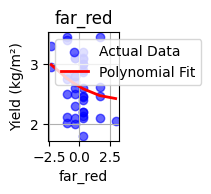

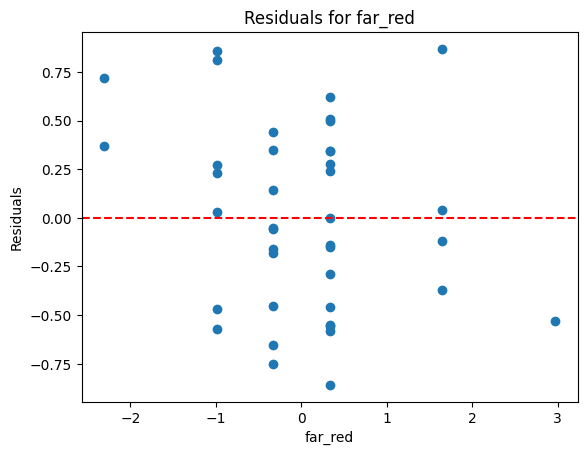

R-squared for humidity : -0.06413983918089583


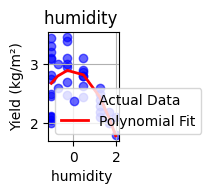

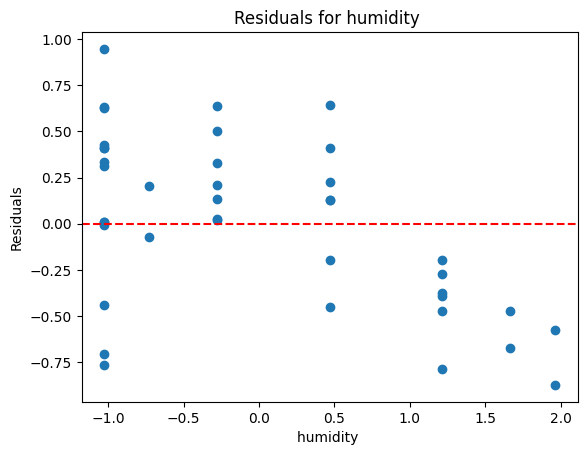

R-squared for ph: -0.18442001283840992


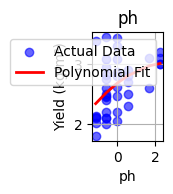

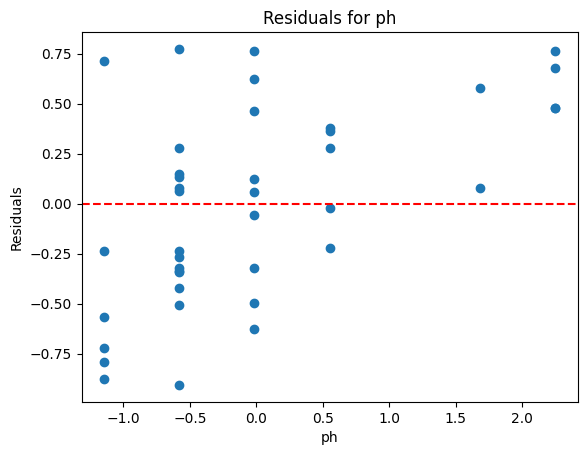

<ipython-input-38-06c7d8a4b0f0>:11: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = np.polyfit(feature_data, yield_values, poly_degree)


R-squared for light_time_day_12: -0.03944359619506366


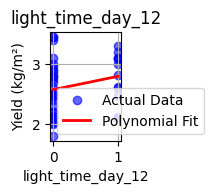

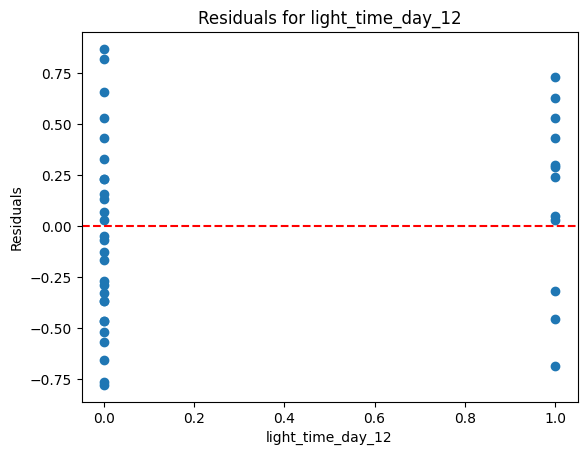

<ipython-input-38-06c7d8a4b0f0>:11: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = np.polyfit(feature_data, yield_values, poly_degree)


R-squared for light_time_day_14: -0.1318968050866285


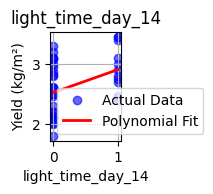

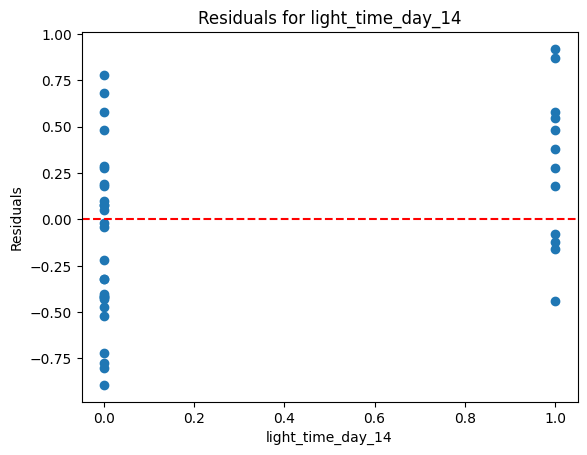

<ipython-input-38-06c7d8a4b0f0>:11: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = np.polyfit(feature_data, yield_values, poly_degree)


R-squared for light_time_day_16: -0.3444907994810156


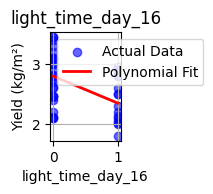

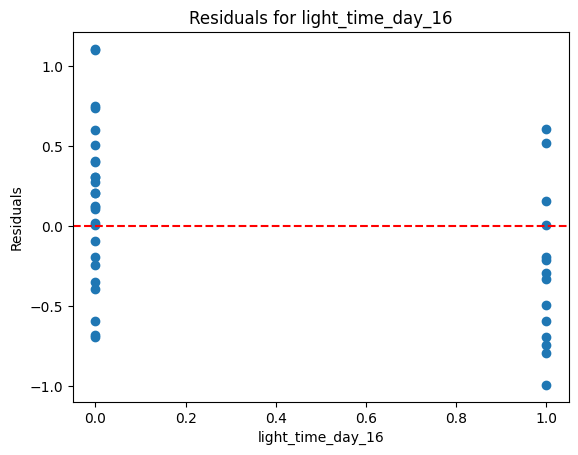

<ipython-input-38-06c7d8a4b0f0>:11: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = np.polyfit(feature_data, yield_values, poly_degree)


R-squared for light_time_day_18: -0.010887334247103198


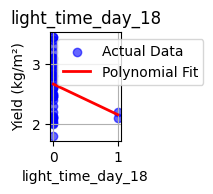

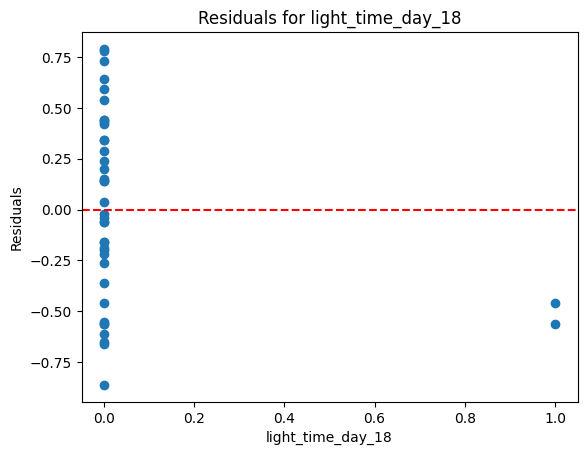

<ipython-input-38-06c7d8a4b0f0>:11: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = np.polyfit(feature_data, yield_values, poly_degree)


R-squared for water_times (times/day)_4: -0.15544710750190194


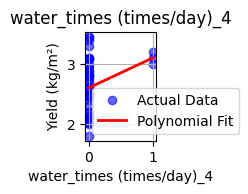

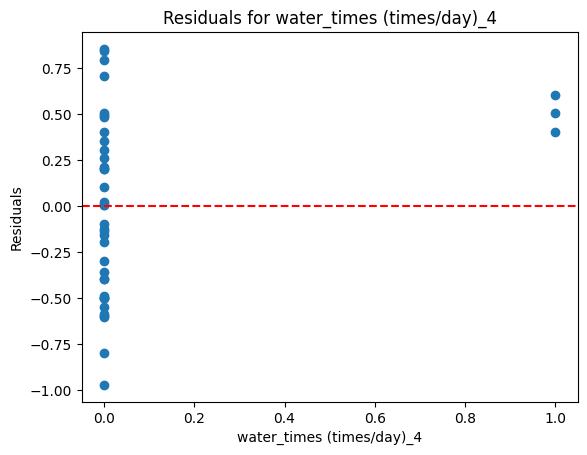

R-squared for water_times (times/day)_5: -0.1395415193470857


<ipython-input-38-06c7d8a4b0f0>:11: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = np.polyfit(feature_data, yield_values, poly_degree)


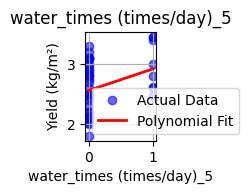

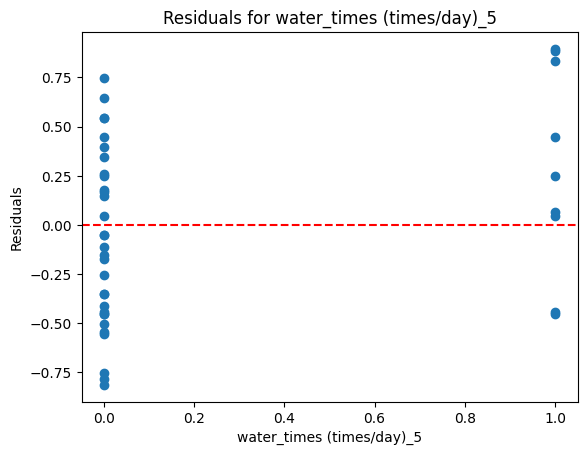

<ipython-input-38-06c7d8a4b0f0>:11: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = np.polyfit(feature_data, yield_values, poly_degree)


R-squared for water_times (times/day)_6: -0.03608793359282658


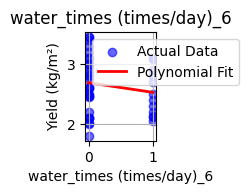

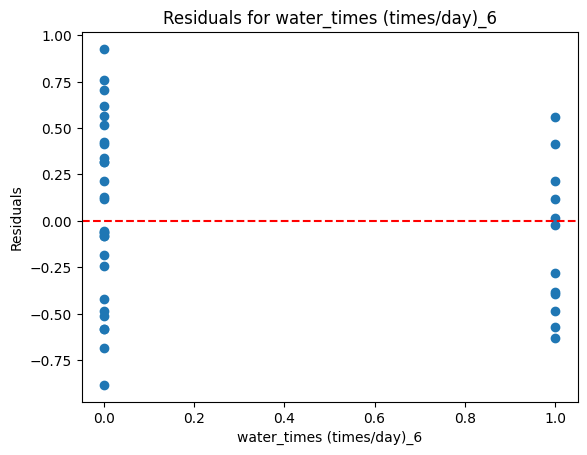

R-squared for water_times (times/day)_7: -0.02066845849775234


<ipython-input-38-06c7d8a4b0f0>:11: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = np.polyfit(feature_data, yield_values, poly_degree)


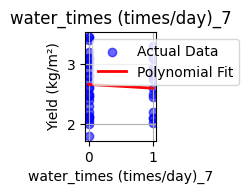

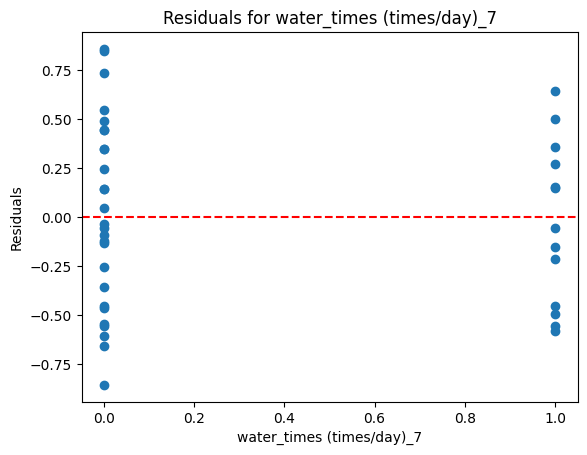

<ipython-input-38-06c7d8a4b0f0>:11: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = np.polyfit(feature_data, yield_values, poly_degree)


R-squared for water_times (times/day)_8: -0.08474566693744823


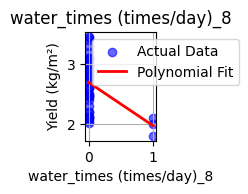

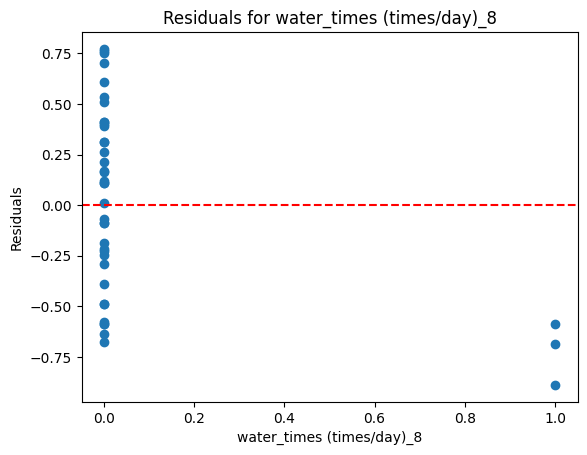

<Figure size 640x480 with 0 Axes>

Coefficients for Polynomial Regression:
--------------------------------------
temp: [0.10660387 0.23031449 2.52839613]
EC ds/m: [-0.17581218  0.09893892  2.81081218]
red_light: [-0.04267777 -0.05086834  2.67767777]
blue_light: [-0.02671409  0.19493675  2.66171409]
far_red: [ 0.0173581  -0.11835245  2.6176419 ]
humidity : [-0.26028346 -0.05130255  2.89528346]
ph: [-0.04553457  0.24759138  2.68053457]
light_time_day_12: [0.11071429 0.11071429 2.56857143]
light_time_day_14: [0.19047619 0.19047619 2.52071429]
light_time_day_16: [-0.22472527 -0.22472527  2.79230769]
light_time_day_18: [-0.25526316 -0.25526316  2.66052632]
water_times (times/day)_4: [0.25135135 0.25135135 2.5972973 ]
water_times (times/day)_5: [0.18028674 0.18028674 2.55387097]
water_times (times/day)_6: [-0.08035714 -0.08035714  2.68321429]
water_times (times/day)_7: [-0.03162393 -0.03162393  2.65555556]
water_times (times/day)_8: [-0.36126126 -0.36126126  2.68918919]


In [38]:
# Plot each feature vs yield and fit a polynomial regression
# plt.figure(figsize=(15, 15)) # Adjust figure size to accommodate more plots

# Calculate the number of rows and columns for subplots
num_features = len(features)
num_cols = 6  # You can adjust this if needed
num_rows = (num_features + num_cols - 1) // num_cols # Calculate rows needed

for i, (feature_name, feature_data) in enumerate(features.items(), start=1):
    # Fit polynomial regression
    poly_coeff = np.polyfit(feature_data, yield_values, poly_degree)
    coefficients[feature_name] = poly_coeff

    # Generate predictions for plotting
    x_sorted = np.sort(feature_data)
    y_fit = np.polyval(poly_coeff, x_sorted)

    # Plot
    plt.subplot(num_rows, num_cols, i) # Use calculated rows and columns
    plt.scatter(feature_data, yield_values, label='Actual Data', color='blue', alpha=0.6)
    plt.plot(x_sorted, y_fit, label='Polynomial Fit', color='red', linewidth=2)
    plt.title(feature_name)
    plt.xlabel(feature_name)
    plt.ylabel('Yield (kg/m²)')
    plt.grid(True)
    plt.legend()
    r2 = r2_score(yield_values, y_fit)
    print(f"R-squared for {feature_name}: {r2}")

    # Calculate residuals
    residuals = yield_values - y_fit

         # Plot residuals
    plt.figure()
    plt.scatter(feature_data, residuals)
    plt.title(f"Residuals for {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Residuals")
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
    plt.show()

plt.tight_layout()
plt.show()

# Display coefficients
print("Coefficients for Polynomial Regression:")
print("--------------------------------------")
for feature, coeff in coefficients.items():
    print(f"{feature}: {coeff}")

R-squared for water_times (times/day)_8: -0.08474566693744823


# svr

# multi_poly_regression

In [39]:
data.columns

Index(['plant_name', 'temp', 'EC ds/m', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity ', 'ph', 'water_times (times/day)',
       'air flow ', 'growth_yield/m^2 (kg)', 'Active Agents (%)',
       'Growth Time (weeks)', 'accuracy'],
      dtype='object')

In [40]:
data_mp=data.copy()

In [42]:
# prossessing
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder



In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the data_mpset
# data_mp = pd.read_csv('plants data_mp - datura.csv')
# Define features and target
X = data_mp[['EC ds/m', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity ', 'ph', 'water_times (times/day)',
       'air flow ','Growth Time (weeks)']]
y = data_mp['growth_yield/m^2 (kg)']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder object
encoded_air_flow = encoder.fit_transform(X[['air flow ']]) # Fit and transform the 'air flow ' column
encoded_air_flow_df = pd.DataFrame(encoded_air_flow, columns=encoder.get_feature_names_out(['air flow '])) # Create DataFrame from encoded data
X = X.drop(columns=['air flow ']) # Drop original 'air flow ' column
X = pd.concat([X, encoded_air_flow_df], axis=1) # Concatenate encoded data to features


# Split the data_mp into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y_train)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients and corresponding terms
terms = poly.get_feature_names_out(X.columns)
print("Polynomial Regression Model:")
print(f"Intercept: {intercept}")
print("Coefficients:")
for term, coeff in zip(terms, coefficients):
    print(f"{term}: {coeff}")

# Evaluate the model on the test set
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)
r2_score = model.score(X_test_poly, y_test)
print(f"Model R^2 Score: {r2_score}")


Polynomial Regression Model:
Intercept: -7.742343254345099
Coefficients:
EC ds/m: 0.8260150308292161
light_time_day: -0.07567542520152055
red_light: 0.05099993387125924
blue_light: 0.06325254405941237
far_red: 0.0369259204501822
humidity : 0.05149812461074353
ph: 0.08978606401446587
water_times (times/day): -0.14802907186813385
Growth Time (weeks): 0.06312120670713003
air flow _High: 0.06053723128546821
air flow _Low: 0.03967910349433379
air flow _Medium: -0.10021633477980246
Model R^2 Score: 0.5311317656226906


Polynomial Regression Model(degree = 1):
Intercept: -7.742343254345099

Coefficients:
EC ds/m: 0.8260150308292161

light_time_day: -0.07567542520152055

red_light: 0.05099993387125924

blue_light: 0.06325254405941237

far_red: 0.0369259204501822

humidity : 0.05149812461074353

ph: 0.08978606401446587

water_times (times/day): -0.14802907186813385

Growth Time (weeks): 0.06312120670713003

air flow _High: 0.06053723128546821

air flow _Low: 0.03967910349433379

air flow _Medium: -0.10021633477980246

Model R^2 Score: 0.5311317656226906

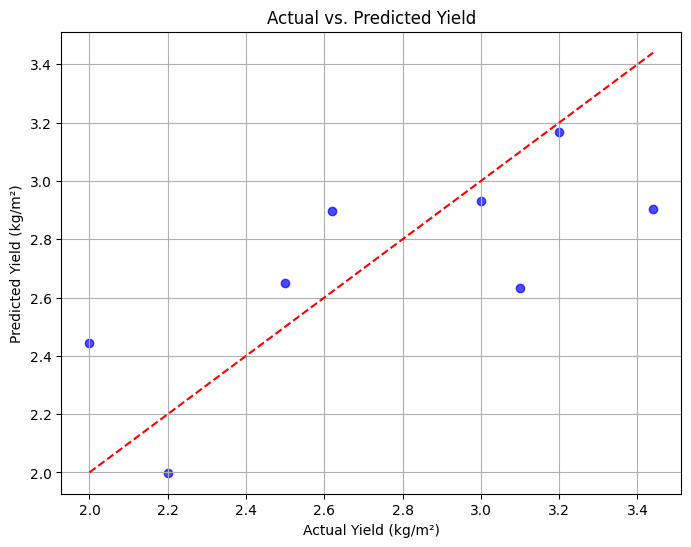

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Add a diagonal line
plt.xlabel("Actual Yield (kg/m²)")
plt.ylabel("Predicted Yield (kg/m²)")
plt.title("Actual vs. Predicted Yield")
plt.grid(True)
plt.show()

# decision tree

In [7]:
data_ct=data.copy()

Mean Squared Error: 0.18792499999999995
R-squared: 0.1682664379961828


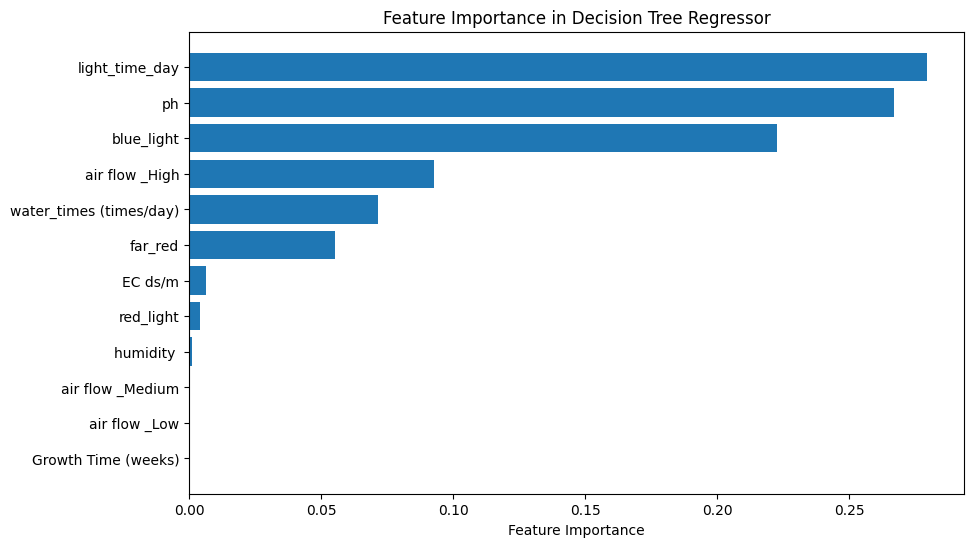

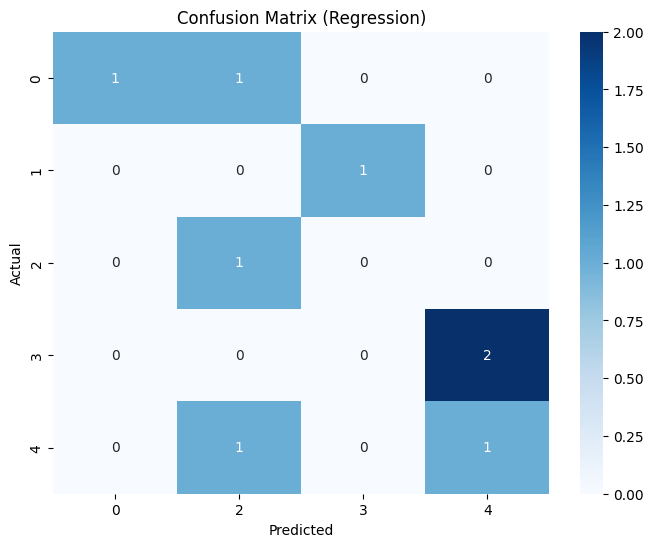

In [8]:
!pip install matplotlib seaborn scikit-learn pandas numpy
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# data_ct = pd.read_csv('plants data_ct - datura.csv')
# Define features and target
X = data_ct[['EC ds/m', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity ', 'ph', 'water_times (times/day)',
       'air flow ','Growth Time (weeks)']]
y = data_ct['growth_yield/m^2 (kg)']

# One-hot encoding for 'air flow ' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_air_flow = encoder.fit_transform(X[['air flow ']])
encoded_air_flow_df = pd.DataFrame(encoded_air_flow, columns=encoder.get_feature_names_out(['air flow ']))
X = X.drop(columns=['air flow '])
X = pd.concat([X, encoded_air_flow_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance
feature_importances = tree_regressor.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Regressor")
plt.show()

# Confusion Matrix (adapted for regression)
# Bin the target variable into categories for the confusion matrix
num_bins = 5  # Adjust the number of bins as needed
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

confusion_matrix = pd.crosstab(y_test_bins, y_pred_bins,
                               rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Regression)")
plt.show()

Mean Squared Error: 0.07069375166666662
R-squared: 0.6871179146727155


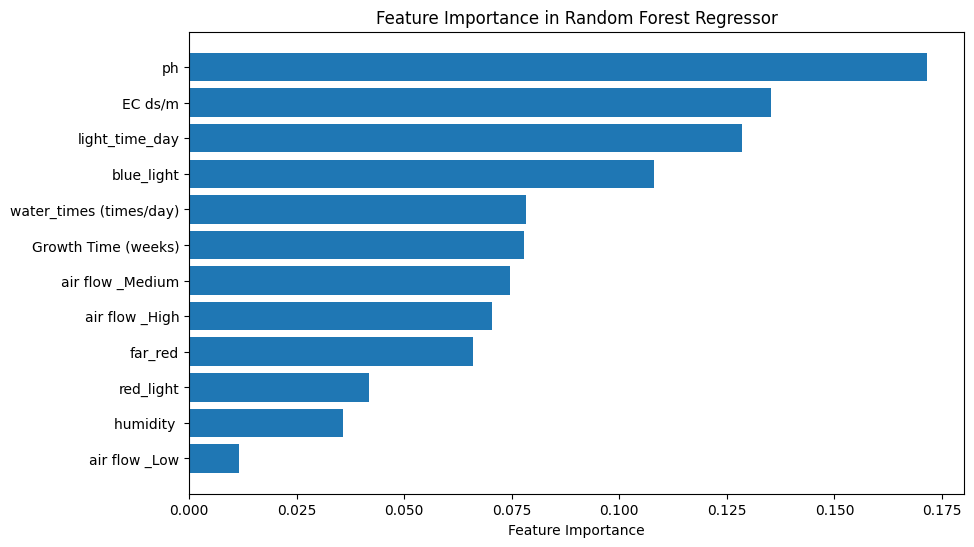

In [9]:
# random forest

!pip install matplotlib seaborn scikit-learn pandas numpy
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
# data_ct = pd.read_csv('plants data_ct - datura.csv')  # Replace with your actual file path
# Define features and target
X = data_ct[['EC ds/m', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity ', 'ph', 'water_times (times/day)',
       'air flow ','Growth Time (weeks)']]
y = data_ct['growth_yield/m^2 (kg)']

# One-hot encoding for 'air flow ' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_air_flow = encoder.fit_transform(X[['air flow ']])
encoded_air_flow_df = pd.DataFrame(encoded_air_flow, columns=encoder.get_feature_names_out(['air flow ']))
X = X.drop(columns=['air flow '])
X = pd.concat([X, encoded_air_flow_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=150, random_state=42)  # You can adjust n_estimators
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance
feature_importances = rf_regressor.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Regressor")
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[1 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 2]
 [0 0 0 0 2]]
Accuracy: 0.375
Precision (macro-averaged): 0.3
Recall (macro-averaged): 0.3


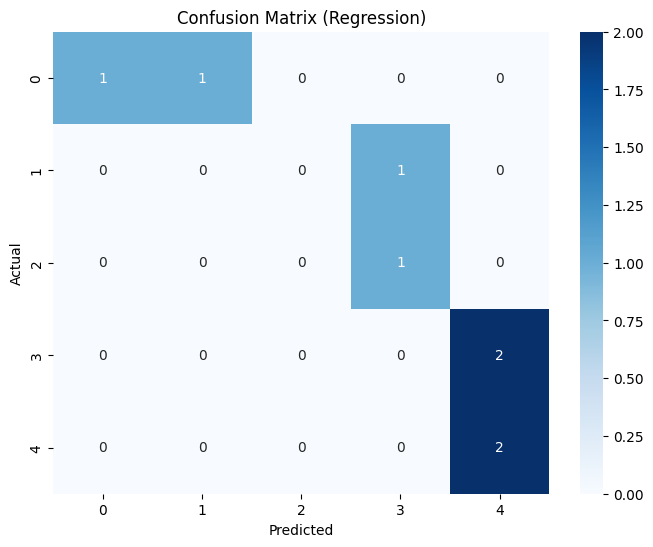

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 5  # Adjust the number of bins as needed
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# 2. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# 3. Calculate accuracy
accuracy = accuracy_score(y_test_bins, y_pred_bins)

# 4. Calculate precision (macro-averaged)
precision = precision_score(y_test_bins, y_pred_bins, average='macro')

# 5. Calculate recall (macro-averaged)
recall = recall_score(y_test_bins, y_pred_bins, average='macro')

# Print the metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision (macro-averaged): {precision}")
print(f"Recall (macro-averaged): {recall}")

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mean Squared Error: 0.07405180801309097
R-squared: 0.6722555591243795
Confusion Matrix:
[[2 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 2]
 [0 0 0 0 2]]
Accuracy: 0.5
Precision (macro-averaged): 0.3
Recall (macro-averaged): 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


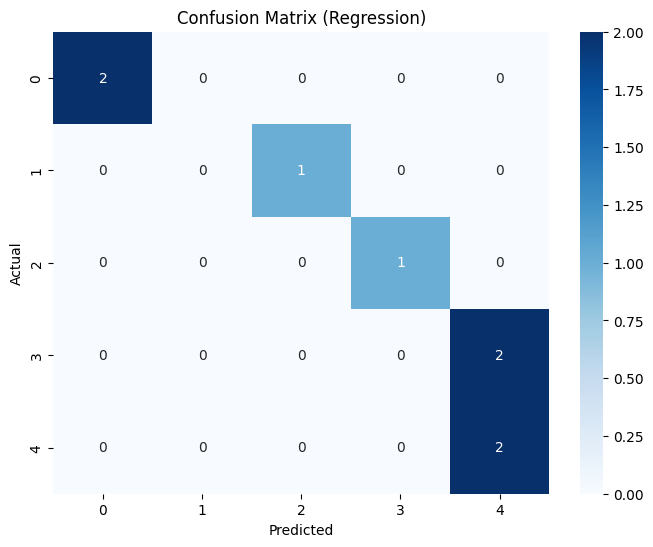

In [11]:
# with grid search

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# data_ct = pd.read_csv('plants data_ct - datura.csv')
# Define features and target
X = data_ct[['EC ds/m', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity ', 'ph', 'water_times (times/day)',
       'air flow ','Growth Time (weeks)']]
y = data_ct['growth_yield/m^2 (kg)']

# One-hot encoding for 'air flow ' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_air_flow = encoder.fit_transform(X[['air flow ']])
encoded_air_flow_df = pd.DataFrame(encoded_air_flow, columns=encoder.get_feature_names_out(['air flow ']))
X = X.drop(columns=['air flow '])
X = pd.concat([X, encoded_air_flow_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# grid search for hyperparameters

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42,n_estimators=200)


# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_regressor = grid_search.best_estimator_


# ----> Prediction and Evaluation <----
# Make predictions on the test set using the best model
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model (MSE and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# ----> Confusion Matrix, Recall, Precision, Accuracy <----
# 1. Discretize (bin) the target variable
num_bins = 5  # Adjust the number of bins as needed
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# 2. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# 3. Calculate accuracy
accuracy = accuracy_score(y_test_bins, y_pred_bins)

# 4. Calculate precision (macro-averaged)
precision = precision_score(y_test_bins, y_pred_bins, average='macro')

# 5. Calculate recall (macro-averaged)
recall = recall_score(y_test_bins, y_pred_bins, average='macro')

# Print the metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision (macro-averaged): {precision}")
print(f"Recall (macro-averaged): {recall}")

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

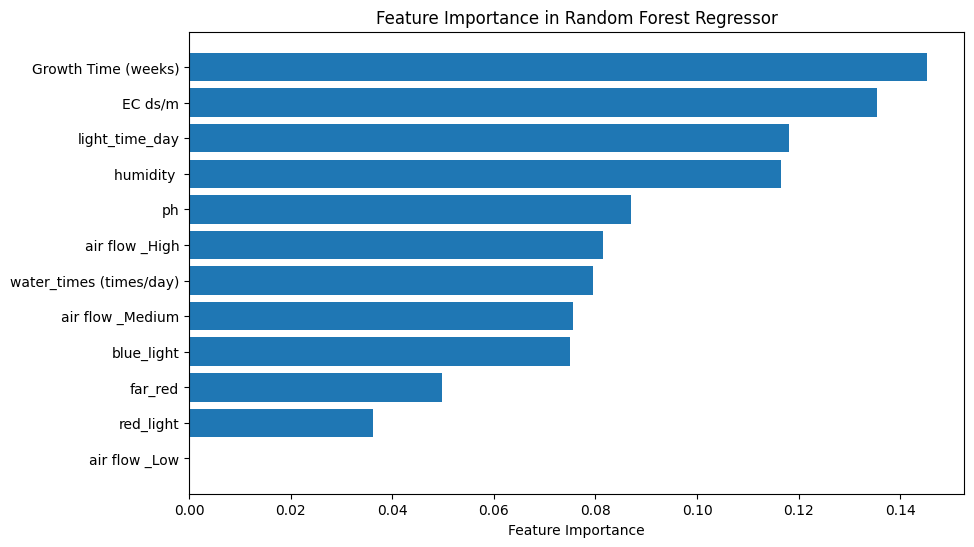

In [12]:

# Feature Importance
feature_importances = best_rf_regressor.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Regressor")
plt.show()

Mean Squared Error: 0.07441152871690457
R-squared: 0.6706634783351848
Confusion Matrix:
[[2 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 2]
 [0 0 0 0 2]]
Accuracy: 0.5
Precision (macro-averaged): 0.3
Recall (macro-averaged): 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


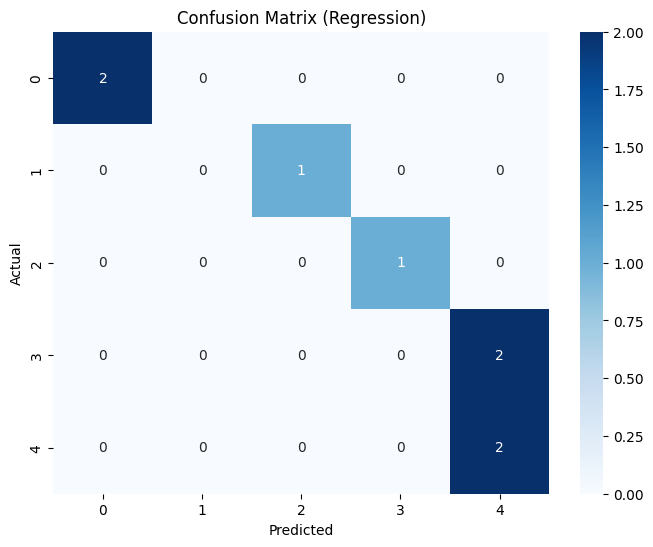

In [13]:
# random search (exhastive search )
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 30],
    'min_samples_split': randint(2, 11),  # Uniform distribution between 2 and 10
    'min_samples_leaf': randint(1, 5),  # Uniform distribution between 1 and 4
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=rf_regressor,
     param_distributions=param_dist,
     n_iter=150, cv=5, scoring='neg_mean_squared_error', random_state=42)

random_search.fit(X_train, y_train)
best_rf_regressor = random_search.best_estimator_

# ----> Prediction and Evaluation <----
# Make predictions on the test set using the best model
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model (MSE and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# ----> Confusion Matrix, Recall, Precision, Accuracy <----
# 1. Discretize (bin) the target variable
num_bins = 5  # Adjust the number of bins as needed
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# 2. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# 3. Calculate accuracy
accuracy = accuracy_score(y_test_bins, y_pred_bins)

# 4. Calculate precision (macro-averaged)
precision = precision_score(y_test_bins, y_pred_bins, average='macro')

# 5. Calculate recall (macro-averaged)
recall = recall_score(y_test_bins, y_pred_bins, average='macro')

# Print the metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision (macro-averaged): {precision}")
print(f"Recall (macro-averaged): {recall}")

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
!pip install tpot # Install tpot and its dependencies
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, cv=5, scoring='neg_mean_squared_error', random_state=42, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline.py')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.9 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=aab900a702f2d0a401ac5d5f3def070d1f773fe8b686b06f744241228d537bfe
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.1449368352116341

Generation 2 - Current best internal CV score: -0.1449368352116341

Generation 3 - Current best internal CV score: -0.1449368352116341

Generation 4 - Current best internal CV score: -0.1449368352116341

Generation 5 - Current best internal CV score: -0.1449368352116341

Best pipeline: AdaBoostRegressor(FastICA(input_matrix, tol=0.8500000000000001), learning_rate=0.5, loss=square, n_estimators=100)
-0.14848688389756934


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import FastICA
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ... (Load and preprocess your data as before) ...

# 1. One-hot encoding for 'air flow ' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_air_flow = encoder.fit_transform(X[['air flow ']])
encoded_air_flow_df = pd.DataFrame(encoded_air_flow, columns=encoder.get_feature_names_out(['air flow ']))
X = X.drop(columns=['air flow '])
X = pd.concat([X, encoded_air_flow_df], axis=1)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and apply FastICA for feature extraction
ica = FastICA(tol=0.85, random_state=42) # tol value from TPOT output
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

# 4. Create and train the AdaBoostRegressor
ada_regressor = AdaBoostRegressor(
    base_estimator=None,  # Use default base estimator (DecisionTreeRegressor)
    n_estimators=100,    # From TPOT output
    learning_rate=0.5,   # From TPOT output
    loss='square',       # From TPOT output
    random_state=42
)
ada_regressor.fit(X_train_ica, y_train)

# 5. Make predictions and evaluate
y_pred = ada_regressor.predict(X_test_ica)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

KeyError: "None of [Index(['air flow '], dtype='object')] are in the [columns]"